In [1]:
import pandas as pd
from Bio import SeqIO
import os
import re
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
from collections import Counter


files = os.listdir('ortholog_finder/orthogroups')

ortho_regex = r'\[orthologous_to_gene=(.*?)\]'

strings = []
for f in files:
    records = SeqIO.parse(f'ortholog_finder/orthogroups/{f}', 'fasta')

    for r in records:
        ortho_match = re.search(ortho_regex, r.description)

        if ortho_match:
            ortho_to = ortho_match.group(1)

            strings.append(ortho_to)

            # need to count each gene only once. if two genes are marked
            # as ortho to SSA1, we're counting those twice for SSA1s count
            # Maybe only write the ortho with highest identity to file?

# Count the occurrences of each string
counts = Counter(strings)

# Extract the labels and sizes
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
labels, sizes = zip(*sorted_counts)


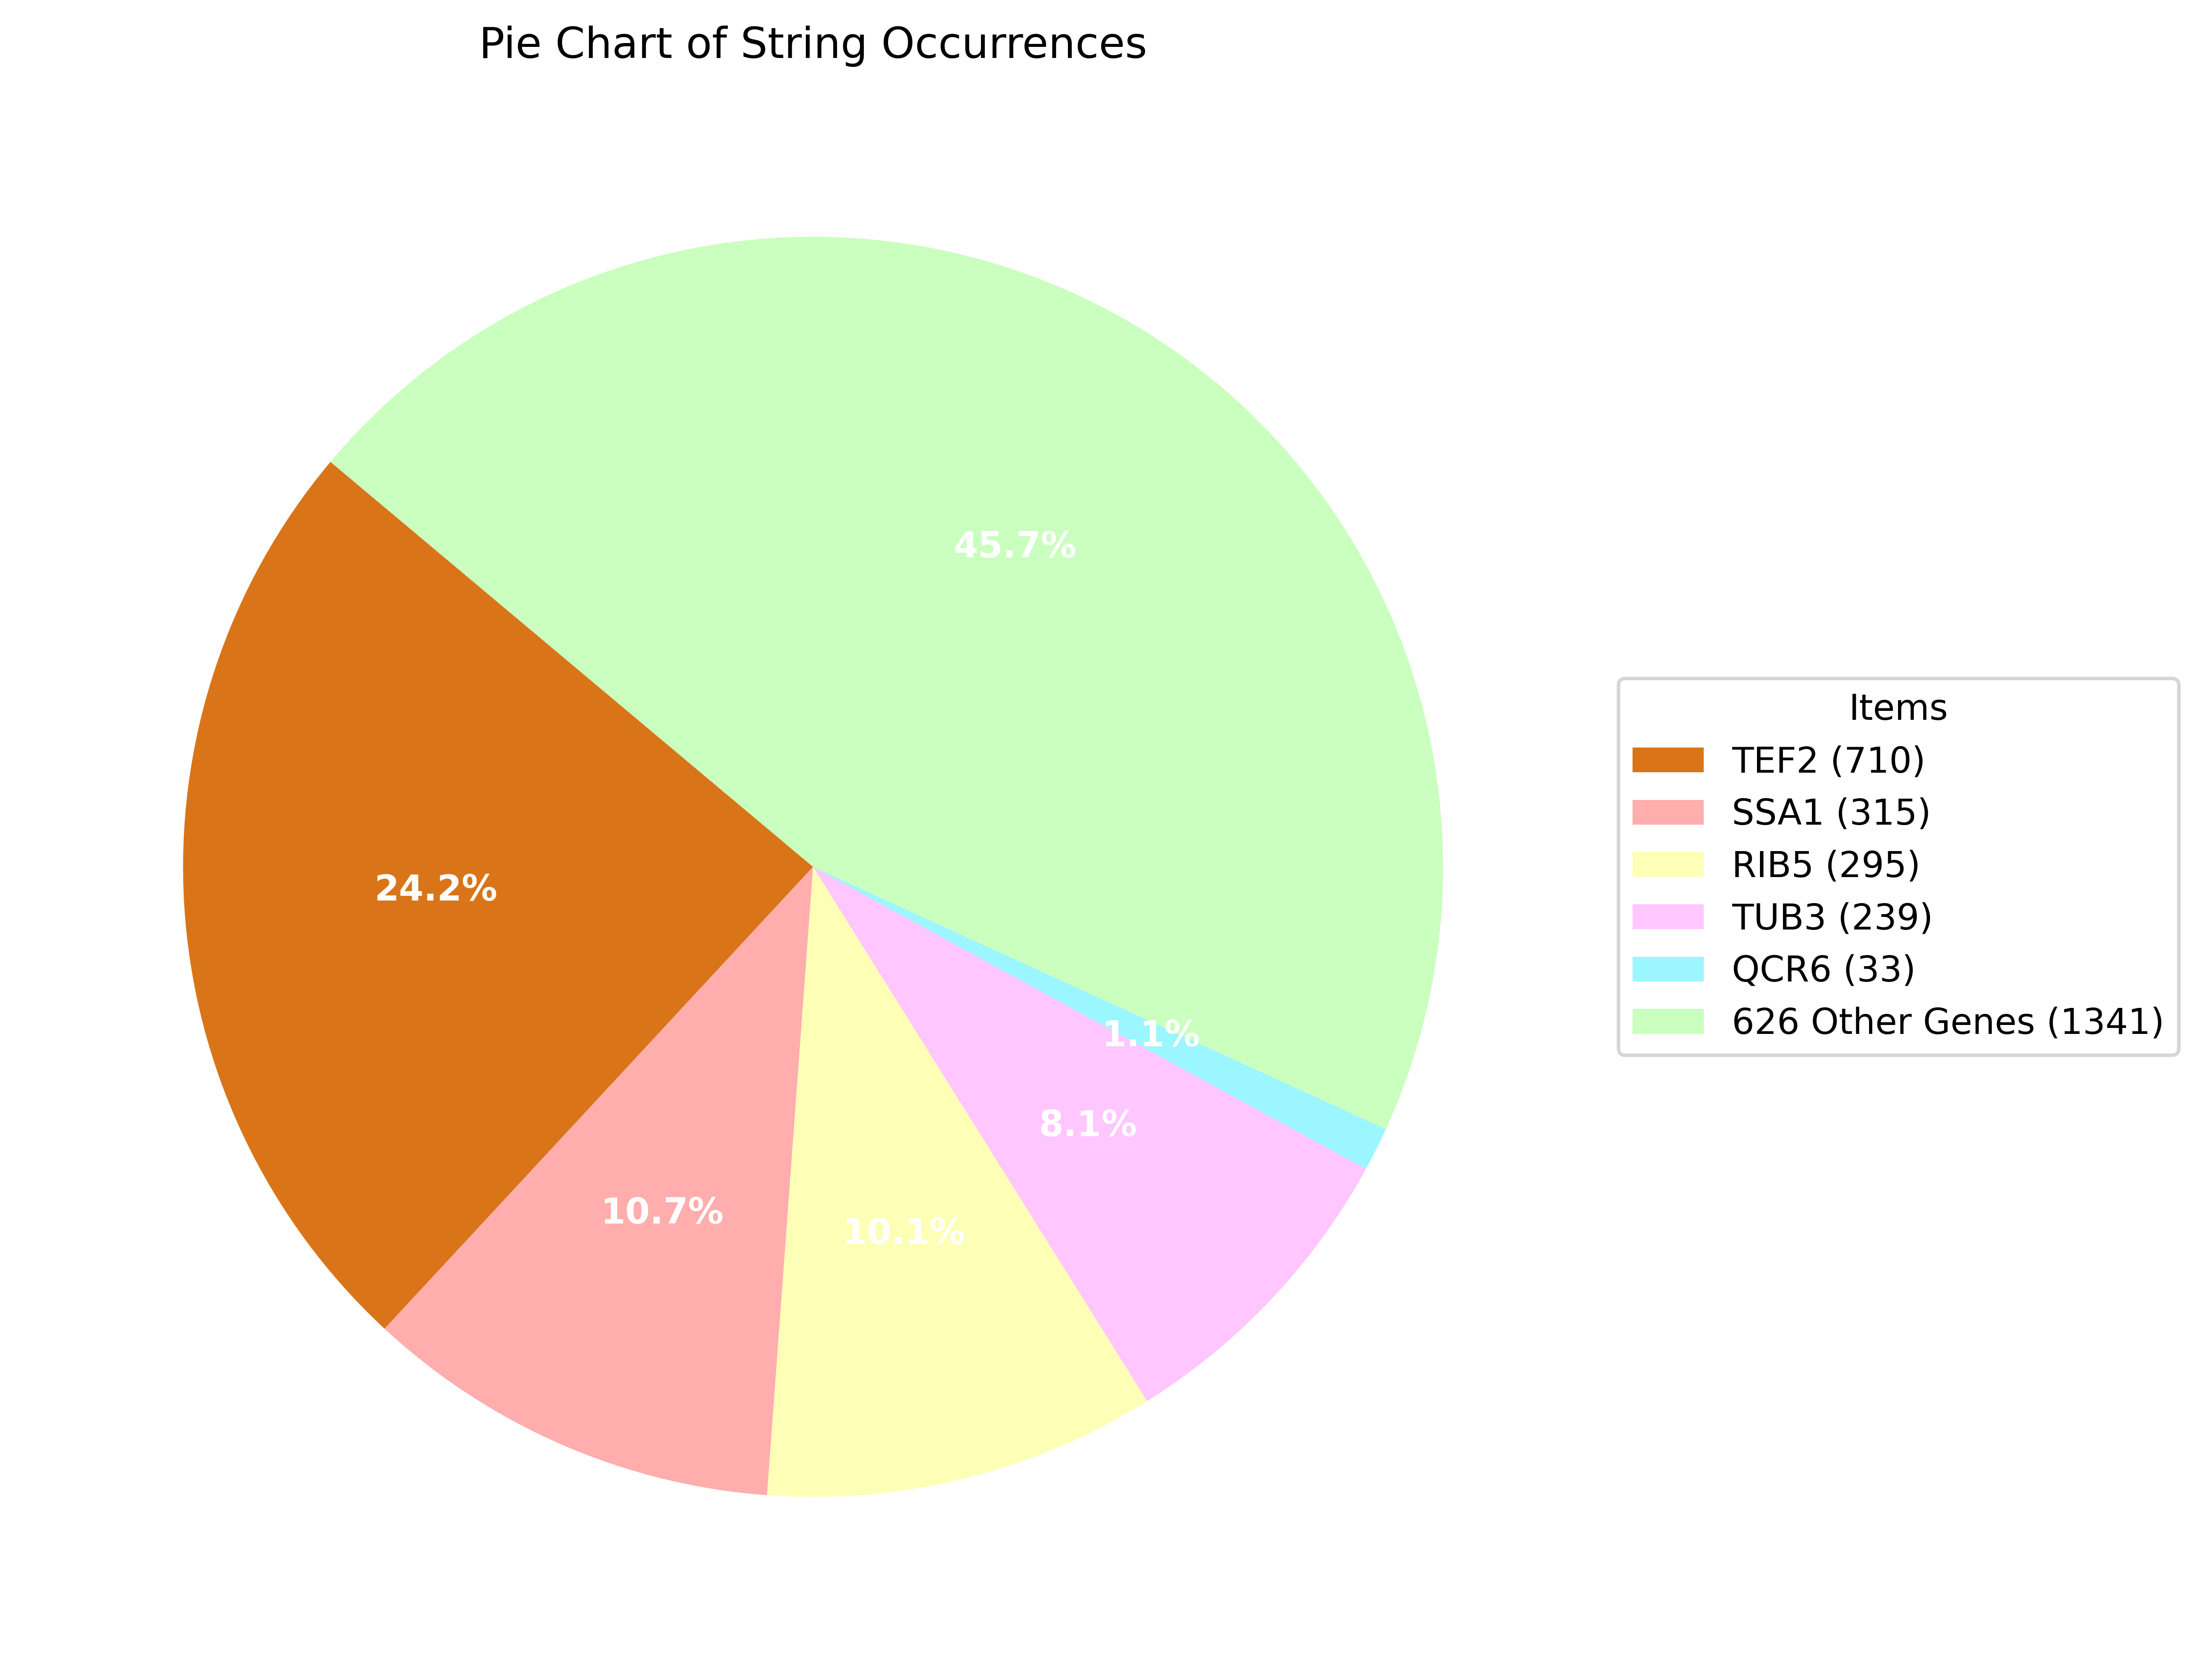

In [2]:
upto = 5
small_sizes = list(sizes[:upto]) + [sum(sizes[upto:])]
small_labels = list(labels[:upto]) + [f'{len(labels) - upto} Other Genes']

colors = ['#D97518', '#FFADAD', '#FDFFB6', '#FFC6FF', '#9BF6FF', '#CAFFBF']
# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(small_sizes, colors=colors, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))

# Add a legend with both labels and sizes
legend_labels = [f"{label} ({size})" for label, size in zip(small_labels, small_sizes)]
ax.legend(wedges, legend_labels, title="Items", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Pie Chart of String Occurrences")

plt.show()

In [3]:
gene_names = [
  'PAU8', 'SEO1', 'TDA8', 'FLO9', 'GDH3', 'BDH2',
  'BDH1', 'ECM1', 'CNE1', 'GPB2', 'PEX22', 'ACS1', 'FLC2',
  'OAF1', 'AIM2', 'GEM1', 'SPC72', 'BOL3', 'BOL1', 'GCV3',
  'PTA1', 'ERV46', 'CDC24', 'CLN3', 'CYC3', 'CDC19', 'RBG1', 
  'FUN12', 'MTW1', 'FUN19', 'POP5', 'PRP45', 'GIP4', 'SNC1',
  'MYO4', 'FRT2', 'SAW1', 'DRS2', 'MAK16', 'LTE1', 'PMT2', 
  'FUN26', 'CCR4', 'ATS1', 'FUN30', 'LDS1', 'PSK1', 'TPD3', 
  'NTG1', 'SYN8', 'DEP1', 'CYS3', 'SWC3', 'MDM10', 'SPO7',
   'FUN14', 'ERP2', 'SSA1', 'EFB1', 'VPS8', 'TFC3', 'NUP60',
    'ERP1', 'SWD1', 'RFA1', 'SEN34', 'BUD14', 'ADE1', 'KIN3', 
    'CDC15', 'PAU7', 'DFP1', 'UIP3', 'KTD1', 'DFP2', 'PRM9', 'MST28', 'YAT1', 'SWH1', 'FLO1', 'PHO11', 'PAU9', 'MIX23', 'SRO77', 'PKC1', 'SEA4', 'RTG3', 'SFT2', 'ECM21', 'ATP1', 'BNA4', 'BRN1', 'MRX3', 'ROX3', 'RPL32', 'SCS22', 'MAP2', 'MRP21', 'AVT5', 'TEL1', 'RPL23A', 'BOI1', 'CDC27', 'ALG3', 'PET112', 'NUP170', 'ATG8', 'ILS1', 'SSA3', 'AAR2', 'RPS8A', 'KTI11', 'AST1', 'PRS4', 'UBP13', 'SEF1', 'PRX1', 'KIP1', 'SKT5', 'YEL1', 'CMC2', 'IAI11', 'SHP1', 'PTH2', 'PTC3', 'TOD6', 'SAS3', 'PIN4', 'SEC17', 'MOH1', 'RRT1', 'EDE1', 'PSY4', 'COR1', 'ECM13', 'FUI1', 'PRE7', 'ERD2', 'MIN6', 'URA7', 'MRPL16', 'APL3', 'POL12', 'STU1', 'RIB1', 'HEK2', 'SHE1', 'PET9', 'RPL19B', 'LSM2', 'RRN10', 'NCL1', 'MCM2', 'PIM1', 'HAP3', 'RFT1', 'APN2', 'POP8', 'PEP1', 'FUS3', 'ACH1', 'RRN6', 'FMT1', 'SCT1', 'LAA2', 'ALK2', 'HIR1', 'SLA1', 'LDB7', 'PDR3', 'UTP20', 'HTA2', 'HTB2', 'ECM15', 'NTH2', 'RER2', 'COQ1', 'GPI18', 'RCR1', 'UGA2', 'DSF2', 'FLR1', 'HHF1', 'HHT1', 'IPP1', 'GRX7', 'MNN2', 'KAP104', 'GAL7', 'GAL10', 'GAL1', 'FUR4', 'POA1', 'CHS3', 'SCO2', 'OLA1', 'ETR1', 'YPK3', 'CDS1', 'RKM3', 'RPL4A', 'EDS1', 'HMT1', 'PDX3', 'CSG2', 'SCO1', 'CHS2', 'ATP3', 'FIG1', 'FAT1', 'CST26', 'QDR3', 'TCM62', 'GIP1', 'ZTA1', 'FMP23', 'RPS11B', 'REB1', 'REG2', 'RFS1', 'YRO2', 'PRP6', 'MRX18', 'MNC1', 'MUM2', 'UBP14', 'TSC3', 'AKL1', 'ORC2', 'TRM7', 'CNM1', 'ECM2', 'NRG2', 'TIP1', 'BAP2', 'TAT1', 'ALG14', 'HSP26', 'RDH54', 'PFF1', 'ECM8', 'SLM4', 'ECM33', 'RPG1', 'SEC18', 'SPT7', 'UBC4', 'TEC1', 'MIS1', 'RPL19A', 'AAC3', 'IST2', 'RFC5', 'POL30', 'NHP6B', 'TIM12', 'PHO3', 'PHO5', 'PBY1', 'RXT2', 'VPS15', 'MMS4', 'FES1', 'EXO84', 'SIF2', 'YMC2', 'VID24', 'SND3', 'IML3', 'AIM3', 'CMD1', 'ALG1', 'YSA1', 'SUS1', 'CYC8', 'RAD16', 'LYS2', 'TKL2', 'TEF2', 'MUD1', 'CBP6', 'GRS1', 'MRPL36', 'TFC1', 'PTC4', 'TPS1', 'MEO1', 'VMA2', 'ATG14', 'OPY1', 'SHE3', 'CCZ1', 'AGP2', 'HSL7', 'CKS1', 'MEC1', 'ATG42', 'IRA1', 'BMT2', 'MAK5', 'SUP45', 'ADH5', 'MRPS9', 'RTC2', 'YSW1', 'ARA1', 'TBS1', 'APD1', 'SPP381', 'RIB7', 'RPB5', 'CNS1', 'SLI15', 'ICS2', 'AMN1', 'IFA38', 'CDC28', 'CSH1', 'TOS1', 'YSY6', 'EXO5', 'ARL1', 'UBS1', 'TYR1', 'POP7', 'PEX32', 'SSE2', 'NPL4', 'SEC66', 'SMY2', 'UMP1', 'SWD3', 'ECM31', 'EHT1', 'FZO1', 'DTR1', 'RPS6B', 'SMP1', 'YPC1', 'MBA1', 'PCH2', 'GDT1', 'NTC20', 'RPS9B', 'RPL21A', 'RIM2', 'MED8', 'AIM4', 'MSI1', 'PGI1', 'TAF5', 'KTR4', 'BEM1', 'DER1', 'MIN7', 'MCM7', 'COS111', 'LDH1', 'KTR3', 'FTH1', 'DUR12', 'ERV15', 'AME1', 'NGR1', 'MET8', 'SDS24', 'HPC2', 'YBP1', 'ATG12', 'PYC2', 'PDB1', 'PCS60', 'TDP1', 'MCX1', 'SLX1', 'ROT2', 'OM14', 'COQ21', 'SWC5', 'PBP2', 'DAD3', 'ARC40', 'VHC1', 'ABD1', 'PRP5', 'ERT1', 'THI2', 'VVS1', 'ALG7', 'GPX2', 'ISW1', 'RRT2', 'ENP1', 'HIS7', 'ARO4', 'SPO23', 'MRPS5', 'DUT1', 'SRB6', 'TRS20', 'MTC4', 'RCF3', 'RIB5', 'POP4', 'SHG1', 'RGD1', 'TAE1', 'MIC12', 'SHM1', 'YPT10', 'TSC10', 'REI1', 'SLM6', 'MRPL37', 'SDH8', 'BIT2', 'EFM2', 'HSM3', 'UBX7', 'CHK1', 'RIF1', 'PPS1', 'DPB3', 'PAF1', 'SAF1', 'DUG2', 'MRPL27', 'SSH1', 'APE3', 'APM3', 'SNF5', 'BSD2', 'CTP1', 'VBA2', 'SUL1', 'PCA1', 'PHO89', 'TYC1', 'MAL33', 'MAL31', 'MAL32', 'PAU24', 'COS2', 'GEX1', 'VBA3', 'HMLALPHA2', 'HMLALPHA1', 'CHA1', 'VAC17', 'MRC1', 'KRR1', 'FYV5', 'ADF1', 'MIC10', 'PRD1', 'PEX34', 'KAR4', 'RDT1', 'SPB1', 'PBN1', 'LRE1', 'APA1', 'SPS22', 'POF1', 'EMC1', 'MGR1', 'PDI1', 'GLK1', 'GID7', 'ATG22', 'SRO9', 'GFD2', 'GRX1', 'LSB5', 'MXR2', 'STE50', 'RRP7', 'HIS4', 'BIK1', 'RNQ1', 'FUS1', 'HBN1', 'FRM2', 'AGP1', 'KCC4', 'LEU2', 'NFS1', 'DCC1', 'BUD3', 'GBP2', 'SGF29', 'ILV6', 'STP22', 'VMA9', 'LDB16', 'PGS1', 'RER1', 'CDC10', 'MRPL32', 'YCP4', 'CIT2', 'DFP3', 'SAT4', 'RVS161', 'ADY2', 'ADP1', 'PGK1', 'POL4', 'CTO1', 'CWH43', 'SRD1', 'MAK32', 'PET18', 'MAK31', 'HTL1', 'HSP30', 'SLM5', 'PMP1', 'NPP1', 'RHB1', 'FEN2', 'RIM1', 'SYP1', 'RPS14A', 'BPH1', 'SNT1', 'ELO2', 'RRP43', 'RBK1', 'PHO87', 'BUD5', 'MATALPHA2', 'MATALPHA1', 'TAF2', 'PER1', 'RRT12', 'IMG1', 'BUD23', 'ARE1', 'RSC6', 'THR4', 'CTR86', 'PWP2', 'YIH1', 'TAH1', 'TVS1', 'BUD31', 'HCM1', 'RAD18', 'SED4', 'ATG15', 'CPR4', 'IMG2', 'RSA4', 'SSK22', 'SOL2', 'ERS1', 'EGO2', 'FUB1', 'PAT1', 'PTC6', 'SRB8', 'AHC2', 'TRX3', 'TUP1', 'CSM1', 'ABP1', 'FIG2', 'KIN82', 'MSH3', 'CDC39', 'CDC50', 'OCA4', 'HMRA2', 'HMRA1', 'GIT1', 'EMA35', 'PAU3', 'ADH7', 'RDS1', 'AAD3', 'COS7', 'MPH2', 'SOR2', 'HXT15', 'THI13', 'AAD4', 'LRG1', 'ADY3', 'GUD1', 'AIM6', 'PHO13', 'YPD1', 'GYP7', 'MFG1', 'OST4', 'BRE4', 'PTP1', 'SSB1', 'HO', 'GCS1', 'SHS1', 'WHI4', 'HBT1', 'FMP45', 'CDC13', 'DTD1', 'TIM22', 'RRI1', 'GDH2', 'PRR2', 'NOP6', 'SHR3', 'UGA4', 'CWC2', 'NHP2', 'GLE1', 'YCX1', 'HEM3', 'RTN2', 'ACK1', 'MRPL11', 'TRM8', 'MGT1', 'GGC1', 'ASF2', 'SEC31', 'SNF3', 'NUS1', 'ARF1', 'RPL35A', 'UFD2', 'RBS1', 'PPH22', 'VMA1', 'RPL41A', 'MRX19', 'LYS20', 'INH1', 'AIT1', 'PCL9', 'DLD2', 'GID12', 'AIR2', 'DLD1', 'PAR32', 'GLT1', 'UGA3', 'UGX2', 'SFA1', 'NRP1', 'FAP7', 'CDC36', 'CDC9', 'ENT1', 'MHF2', 'DHH1', 'STE7', 'DMO2', 'CMR1', 'CLB3', 'MSH5', 'SAS10', 'RPC53', 'ATG9', 'NOP14', 'RPN5', 'LDB17', 'COP1', 'CCT4', 'CRD1', 'BPL1', 'RPO21', 'SCM3', 'RGT2', 'ARF2', 'RPL35B', 'RDI1', 'PPH21', 'RPL41B', 'SRF1', 'CDC53', 'LYS21', 'STF1', 'RPP1B', 'VCX1', 'PCL2', 'CDC48', 'HNT1', 'SNA4', 'UBP1', 'EXP1', 'YFH1', 'HEM25', 'CYK3', 'NUP84', 'IWR1', 'ATG20', 'TRM3', 'RRP42', 'TMA17', 'KIN28', 'MSS2', 'PHO2', 'NSE4', 'QRI7', 'QRI1', 'POL3', 'DUN1', 'GET3', 'BUG1', 'SNU23', 'RPN6', 'PMT1', 'PMT5', 'SRP14', 'UBX3', 'RAM1', 'NUR1', 'ASM4', 'LUC7', 'NDE2', 'SUB2', 'RPS16B', 'RPL13A', 'RPP1A', 'THI3', 'MRK1', 'MDH3', 'VAM6', 'RXT3', 'RPL31A', 'BRE1', 'AHK1', 'YET3', 'BDF2', 'CBS1', 'COX9', 'IDP1', 'PEX19', 'UBC9', 'SYO1', 'RPS29B', 'TSR1', 'RAD59', 'USO1', 'MBP1', 'PSA1', 'MCH1', 'PBP4', 'SLC1', 'LHP1', 'KNH1', 'STP4', 'SIT4', 'NPC2', 'MRP10', 'FAD1', 'MTF2', 'PRP11', 'SIR2', 'NAT1', 'PRM7', 'BSC1', 'PUS9', 'GPR1', 'SLM3', 'DBP10', 'PRP9', 'ARP2', 'MPS1', 'MRX9', 'RTK1', 'DIA3', 'GPD1', 'GPM2', 'RPN4', 'OSH2', 'ERP3', 'CDC7', 'TSC13', 'NOP1', 'SLX5', 'GRX6', 'APC11', 'RPT2', 'PTC1', 'MED2', 'ATP16', 'MCD1', 'NHP10', 'RMD1', 'NTH1', 'YRB1', 'RCR2', 'RAD57', 'MAF1', 'SOK1', 'TRP1', 'GAL3', 'SNQ2', 'RPL4B', 'PSF1', 'RAD61', 'HED1', 'DAD1', 'KCS1', 'GCV1', 'DAS2', 'FAL1', 'ATG31', 'SES1', 'RPS11A', 'NSI1', 'VPS54', 'REG1', 'RAD28', 'MIX14', 'PST2', 'MRH1', 'LYS14', 'ARO3', 'EHD3', 'KRS1', 'ENA5', 'ENA2', 'ENA1', 'RSM10', 'NRG1', 'HEM13', 'RPC11', 'BAP3', 'HEM12', 'VMS1', 'TPI1', 'DET1', 'DBF4', 'CDC34', 'PST1', 'EMC10', 'YOS9', 'TGL2', 'UBC5', 'MAK21', 'LCB2', 'AIM7', 'RPS13', 'RRG1', 'RTR2', 'OCA6', 'DOS2', 'DOA4', 'FMP16', 'PAA1', 'IPT1', 'SNF11', 'TPS2', 'PPH3', 'RAD55', 'SED1', 'SHU2', 'PET100', 'TFB5', 'VPS41', 'PDC2', 'STN1', 'RRP8', 'TVP23', 'AFR1', 'SSS1', 'RRP1', 'SLU7', 'VTC5', 'ILT1', 'RLI1', 'UBC13', 'DNF2', 'GIS1', 'MSH6', 'GRX3', 'BMH2', 'TVP15', 'ARX1', 'STE5', 'SPO71', 'TMS1', 'ARP10', 'TMN2', 'TRS85', 'FOB1', 'ALT2', 'PDS1', 'MRX14', 'MRPL1', 'TMA64', 'APC4', 'VBA4', 'COX26', 'TRM1', 'DPB4', 'KIN1', 'INO2', 'ECM18', 'SWF1', 'ARO1', 'MTC5', 'SAC6', 'FIN1', 'MRX16', 'CCW22', 'YCF1', 'RGP1', 'HPR1', 'RUB1', 'MTQ2', 'DOP1', 'PEX7', 'SAN1', 'MKC7', 'TAF12', 'SWI5', 'EKI1', 'KGD2', 'NUM1', 'CTH1', 'GIR2', 'ENT5', 'CPR1', 'RPA14', 'HOM2', 'SAC3', 'SSY1', 'ACL4', 'NBP2', 'CWC15', 'SEC1', 'TRM82', 'SEC5', 'TAF10', 'CDC37', 'STB3', 'SEC7', 'HSP42', 'SUP35', 'ARG82', 'HMO1', 'RSM24', 'NGG1', 'UBC1', 'SDH4', 'CSN9', 'NVJ3', 'SCC2', 'SAS4', 'CDC1', 'PLP1', 'ATC1', 'UPS3', 'SND1', 'CCT6', 'SLY1', 'RVB1', 'HST4', 'NUP42', 'MSS116', 'REF2', 'CAB5', 'CBS2', 'RKM2', 'VPS64', 'SPC19', 'RAV2', 'COQ4', 'MSC2', 'EBS1', 'UME6', 'MSS4', 'GCD6', 'TCP1', 'UPC2', 'AHA1', 'ADR1', 'RAD9', 'SPR28', 'MFB1', 'GTB1', 'CRF1', 'HTB1', 'HTA1', 'ADK1', 'SIR4', 'PCF11', 'IVY1', 'COX20', 'HEM1', 'RTN1', 'LYS4', 'PRP42', 'FMN1', 'MRPL7', 'SEC26', 'SNU56', 'AMD2', 'PRP28', 'PEX5', 'MNN10', 'TRS23', 'VHS1', 'PAM1', 'BTT1', 'MET32', 'CHL4', 'RMD5', 'CTA1', 'RKM4', 'HSP78', 'YAP6', 'SWM1', 'EXG2', 'DIN7', 'AKR1', 'PEX10', 'HEL2', 'CIA1', 'MSW1', 'CCC2', 'GLO2', 'DON1', 'BSC2', 'PMP3', 'MTH1', 'RNH202', 'RRP45', 'PHM6', 'MRX10', 'GCN2', 'DPP1', 'ZIP1', 'MGP12', 'INM2', 'NSE3', 'RTT103', 'HRQ1', 'SRP101', 'SSD1', 'DPL1', 'HDA2', 'MHR1', 'SUR2', 'ATP5', 'BFR2', 'PRO1', 'CFT1', 'GPI11', 'RSC3', 'CPR5', 'HNT2', 'PFU1', 'PMT7', 'SRB7', 'GIC2', 'SUM1', 'TFB1', 'SSF2', 'PIB1', 'RAD34', 'IPK1', 'OMS1', 'HIM1', 'MCM21', 'YFT2', 'SWA2', 'DAD4', 'ASP1', 'MRPL35', 'TIM11', 'PEP7', 'UTP4', 'YCG1', 'YSP2', 'SKP1', 'PEX3', 'UBX5', 'GPI8', 'IRC3', 'RQC1', 'SWR1', 'MSN5', 'MRX8', 'MRPS28', 'FCF1', 'HXT7', 'HXT6', 'HXT3', 'SVF1', 'MRP1', 'PAL1', 'YPS7', 'ATP22', 'SBE2', 'YPQ2', 'TRR1', 'TRP4', 'SPC110', 'CNL1', 'GGA1', 'EAF1', 'BCP1', 'TFC6', 'ESC2', 'SEM1', 'CDC40', 'ESF1', 'MOR1', 'KEI1', 'YPR1', 'XRS2', 'DXO1', 'CTS2', 'VPS74', 'FRQ1', 'PHO92', 'WIP1', 'BCS1', 'ARH1', 'ATP17', 'LSM6', 'RGA2', 'SDH6', 'ARO10', 'YRA1', 'COI1', 'RPP2B', 'NKP1', 'ATO3', 'EFT2', 'MUS81', 'CIN10', 'RVS167', 'SAC7', 'UBA2', 'SPT3', 'SHE9', 'RPT3', 'SXM1', 'NCB2', 'UTP5', 'HPT1', 'URH1', 'DIT2', 'DIT1', 'RPB7', 'MRP20', 'PDR15', 'TRS120', 'ADE8', 'SIZ1', 'STE14', 'DFM1', 'RRP17', 'ERD1', 'SYF1', 'RPL12B', 'RAD30', 'HKR1', 'ARO80', 'SIP1', 'CAD1', 'DYN2', 'SNX41', 'RPN9', 'BNA7', 'TIF35', 'CYM1', 'NPL3', 'GPI17', 'PPM1', 'PPZ2', 'GPI19', 'THI74', 'LRS4', 'DOT1', 'APT2', 'SSN2', 'ECM11', 'RPS17B', 'ADA2', 'UTP6', 'RPS18A', 'YHP1', 'PPN1', 'TSA2', 'GUK1', 'NHX1', 'TOM1', 'HEH2', 'PFA5', 'TFB3', 'MFA1', 'CMI8', 'MRPL28', 'STP1', 'SPP41', 'RMT2', 'PKH3', 'TLG1', 'SDC1', 'UGO1', 'RPL27B', 'TRS31', 'PRP3', 'JIP4', 'SNF1', 'SNM1', 'PEX29', 'DIG2', 'PHO8', 'CWC21', 'KRE2', 'VPS52', 'VPS72', 'VPS60', 'RIB3', 'PAC11', 'SLD5', 'PKH1', 'IZH1', 'MZM1', 'RSM28', 'VPS3', 'PUF6', 'ITR1', 'SEC20', 'LCD1', 'RPL37B', 'PLM2', 'SAM2', 'LPP1', 'SPG3', 'PSP1', 'GMC1', 'GIN4', 'GNP1', 'SMT3', 'SDH7', 'EMI1', 'GRX2', 'SLF1', 'EMI2', 'GRH1', 'EUG1', 'FPR2', 'URC2', 'SPS2', 'SPS1', 'AGE1', 'API2', 'SNA2', 'RBA50', 'HLR1', 'QCR7', 'APA2', 'CAB1', 'KRE28', 'HSP31', 'FIT1', 'STL1', 'PAD1', 'FDC1', 'IRC4', 'PAU10', 'YRF1-1', 'RMD6', 'DLD3', 'DSF1', 'HXT13', 'HPA3', 'SIT1', 'AVT2', 'CAN1', 'NPR2', 'CIN8', 'PRB1', 'SOM1', 'HHY1', 'PCM1', 'SDD1', 'HAT2', 'POL5', 'RPL12A', 'MAK10', 'AFG1', 'VMA8', 'RML2', 'PAU2', 'TCA17', 'FRD1', 'GLY1', 'IES6', 'GTA1', 'GDA1', 'YEF1', 'UTR2', 'CYC7', 'UTR4', 'RAD23', 'ANP1', 'UTR5', 'HYP2', 'MTC7', 'MCM3', 'SPF1', 'ECM10', 'BUD16', 'VMA3', 'SNU13', 'RIP1', 'GEA2', 'URA3', 'TIM9', 'PXP1', 'MMS21', 'EAF5', 'PMP2', 'GTT3', 'NPP2', 'EDC3', 'VAC8', 'UBC8', 'GLC3', 'GCN4', 'MIT1', 'YEA6', 'VAB2', 'YEA4', 'GIM4', 'WBP1', 'IRC22', 'MNN1', 'NOP16', 'PMI40', 'FMP52', 'YND1', 'NUG1', 'PAC2', 'TMA20', 'SEC3', 'NTF2', 'TIR1', 'PRE1', 'PRP22', 'HEM14', 'BUD25', 'FAA2', 'BIM1', 'AFG3', 'SPC25', 'ISC1', 'SBH2', 'GPA2', 'RPN3', 'SRB4', 'PRO3', 'YAT2', 'GCD11', 'CHO1', 'GAL83', 'MIG3', 'SMB1', 'CHZ1', 'YPT31', 'FIR1', 'ZRG8', 'EDC2', 'ARB1', 'PHM8', 'KRE29', 'FMP49', 'HVG1', 'GLN3', 'YEN1', 'MXR1', 'SAH1', 'ERG28', 'MEI4', 'ACA1', 'SPO73', 'SAP1', 'CAJ1', 'ISD11', 'TPA1', 'RSM18', 'JHD1', 'HOM3', 'PIC2', 'GIP2', 'HIS1', 'FCY2', 'RPL34A', 'HMF1', 'PET117', 'PCL6', 'FCY21', 'FCY22', 'CEM1', 'GPP2', 'THO1', 'VHR2', 'ICL1', 'RRT13', 'RGI1', 'MOT2', 'ARG56', 'RNR1', 'TDA2', 'VTC1', 'ALD5', 'RPS24A', 'YOS1', 'PTP3', 'MRX1', 'ICP55', 'AIM9', 'SER3', 'UTP7', 'GET2', 'ILV1', 'AIM10', 'SBH1', 'DOT6', 'PTC2', 'TRP2', 'MET6', 'IES5', 'TSC11', 'AIM11', 'PUP3', 'RAD51', 'SHC1', 'UBP9', 'PRS2', 'UBC6', 'AST2', 'RPS8B', 'SSA4', 'RTT105', 'NUP157', 'MAM1', 'GLE2', 'FLO8', 'KAP123', 'SWI4', 'LSM4', 'TMN3', 'BOI2', 'SPR6', 'SLX8', 'RPL23B', 'SHO1', 'AVT6', 'SCS2', 'GLO3', 'YCK3', 'DSE1', 'RSP5', 'NSA2', 'LCP5', 'VFA1', 'SAK1', 'COM2', 'RPS26B', 'PMD1', 'GLC7', 'GDI1', 'RTR1', 'EMP65', 'COX15', 'MAG1', 'DDI1', 'UBP5', 'FTR1', 'LSM5', 'SCC4', 'SPT15', 'PEA2', 'SPI1', 'UBP3', 'PET122', 'OXA1', 'BEM2', 'MYG1', 'COG3', 'BUR6', 'SPT2', 'RAD4', 'GCG1', 'CHD1', 'PAB1', 'DNF1', 'BCK2', 'CCA1', 'RPH1', 'ADK2', 'RAD3', 'BRR2', 'RAD24', 'GRX4', 'TMT1', 'ECM32', 'BMH1', 'PDA1', 'DMC1', 'ISC10', 'SLO1', 'FMP10', 'FAU1', 'TOG1', 'PUG1', 'YRF1-2', 'COS4', 'DDI3', 'SNO3', 'SNZ3', 'THI5', 'AGP3', 'AQY3', 'DAK2', 'ZNF1', 'ALR2', 'SWP82', 'EMP47', 'RGD2', 'FMP32', 'SEC53', 'OTU1', 'LAM5', 'FET5', 'ACT1', 'YPT1', 'TUB2', 'RPO41', 'MOB2', 'RPL22B', 'MIL1', 'RIM15', 'HAC1', 'AGX1', 'CAK1', 'CAF16', 'GYP8', 'STE2', 'BST1', 'EPL1', 'BUD27', 'FRS2', 'GAT1', 'PAU5', 'LPD1', 'SMX2', 'GNA1', 'MDJ1', 'HSP12', 'IES1', 'HXT10', 'AUA1', 'WWM1', 'CDC4', 'SMC1', 'BLM10', 'SEC4', 'VTC2', 'MSH4', 'SPB4', 'DEG1', 'LOC1', 'NIC96', 'YPI1', 'RPN11', 'SAD1', 'YFH7', 'FAR7', 'GCN20', 'UBP6', 'MIC19', 'DCV1', 'IOC3', 'CMK1', 'GSY1', 'AIP5', 'IGD1', 'FAB1', 'CSS2', 'ATG18', 'ROG3', 'PES4', 'LSB3', 'HIS2', 'ULI1', 'ECO1', 'CDC14', 'PTR3', 'MET10', 'SMC2', 'RPL2A', 'RRT5', 'RPL29', 'MIN10', 'QCR6', 'PHO4', 'CDC26', 'RSC8', 'IRC5', 'OSW7', 'SAP155', 'ERJ5', 'KEG1', 'IRC6', 'DUG1', 'MRX20', 'CNN1', 'BNA6', 'RMD8', 'YMR31', 'PRE4', 'RET2', 'RPN12', 'HXK1', 'IRC7', 'COS12', 'PAU11', 'YPS5', 'VEL1', 'MNT2', 'ADH4', 'ZRT1', 'FZF1', 'HXK2', 'RTG2', 'HFM1', 'RMR1', 'ZIP2', 'PDE1', 'BRR6', 'RAI1', 'GUS1', 'RTF1', 'TAD1', 'ANK1', 'KAP114', 'DOC1', 'CSE1', 'HAP2', 'MTO1', 'ADE57', 'SEC15', 'TAN1', 'EMC4', 'SAP4', 'SHE10', 'VID30', 'OST5', 'MTC3', 'VRG4', 'SDT1', 'COG1', 'EDC1', 'NIF3', 'BOL2', 'MDM34', 'KIP3', 'CLG1', 'SKI8', 'VAM7', 'NCS6', 'YPT32', 'MIG2', 'SIP2', 'SPT16', 'CHC1', 'POX1', 'KEX1', 'ARO8', 'MCM6', 'EMP24', 'YIP4', 'MDS3', 'DSD1', 'GCN1', 'HOS2', 'IME4', 'COX13', 'CDC55', 'RPS26A', 'COX4', 'TPN1', 'STR3', 'MND1', 'GTS1', 'ATG1', 'TOS3', 'MPT5', 'SAE2', 'BUD13', 'XRN1', 'NUP49', 'ROK1', 'SPO74', 'SUA5', 'HUR1', 'PMR1', 'CUP2', 'YRB30', 'RAD54', 'SUT1', 'YIP5', 'AIM14', 'RCK1', 'ARI1', 'AMS1', 'CDC43', 'LYS5', 'PEX14', 'NUT1', 'INO80', 'ARO2', 'RPL9A', 'RRT6', 'TIP20', 'ROG1', 'MRF1', 'GPI10', 'HUL5', 'FLC3', 'SEC27', 'MRM2', 'RPL1B', 'PCL10', 'ITC1', 'SNT2', 'CEG1', 'RSM23', 'CWC23', 'SOH1', 'SCS3', 'MET13', 'MON1', 'RPS2', 'NAB2', 'GPG1', 'PRP43', 'COQ8', 'ARO5', 'CDC20', 'SNF4', 'SLD3', 'TAF6', 'NSA1', 'CUE3', 'RMD9', 'MLC1', 'ARC1', 'VPS73', 'RPL28', 'YGK1', 'SEH1', 'LSG1', 'USE1', 'SRM1', 'TOS8', 'VPS45', 'PAN2', 'SPC105', 'NUP145', 'NBP35', 'LIF1', 'MF(ALPHA)2', 'MMS2', 'MAD1', 'LCL3', 'GUP1', 'SCY1', 'MPC1', 'KXD1', 'DBP3', 'HNM1', 'RPL7A', 'MPS2', 'HSF1', 'AFT1', 'RPB9', 'MNP1', 'NPY1', 'SGF73', 'ALG2', 'MRH4', 'PUS2', 'PYC1', 'DUO1', 'YBP2', 'PKP2', 'RAD6', 'GEP7', 'SDS23', 'OLE1', 'ERV14', 'PRM8', 'MST27', 'TYW3', 'TIF4632', 'RPT6', 'ALG13', 'RIM8', 'RNA15', 'DST1', 'DPC13', 'HEM2', 'OCH1', 'PNC1', 'VIR1', 'MIG1', 'HOP2', 'AGA2', 'RPL24A', 'RPL30', 'CGR1', 'SCW11', 'CWH41', 'TRP5', 'PGD1', 'PIB2', 'STT3', 'ALK1', 'GET1', 'CKB1', 'JAC1', 'ATE1', 'KAP122', 'BIL2', 'PUF4', 'PDR1', 'ERG4', 'SCL1', 'MPO1', 'LEU1', 'PMA1', 'BRP1', 'PMC1', 'COG7', 'RPN14', 'CDH1', 'ERP6', 'ERG26', 'EFM5', 'SWC4', 'CUL3', 'PEX31', 'TFG2', 'PRP18', 'ECT1', 'STF2', 'SEC9', 'NMA2', 'MCY1', 'SNU71', 'MSB2', 'EAT1', 'UGA1', 'VMA7', 'DPC29', 'MTL1', 'THG1', 'RPS25A', 'MSP1', 'ERV1', 'POP6', 'IMO32', 'NAG1', 'GSC2', 'TIM21', 'RPL26B', 'CAX4', 'ACB1', 'ORM1', 'KSS1', 'BUD9', 'MTE1', 'NQM1', 'RME1', 'TAM41', 'TFC4', 'UFD1', 'SCM4', 'FMP48', 'MCO32', 'MUP1', 'RSC1', 'LST7', 'PEF1', 'SPR3', 'ERG25', 'ADE6', 'COX18', 'SPT4', 'VHT1', 'GID10', 'ART5', 'ROM1', 'ENV11', 'UPF3', 'SMD1', 'PRP38', 'MRPL25', 'PEX8', 'PAC10', 'TWF1', 'SLX9', 'TOM20', 'GCD2', 'MRP13', 'RPL11B', 'PIL1', 'PDC6', 'CTT1', 'NNF2', 'UTP22', 'PRP31', 'DBF2', 'DRN1', 'VAS1', 'RRP46', 'TPC1', 'ASK10', 'ESP1', 'TEL2', 'MDR1', 'PCP1', 'GTF1', 'NOP7', 'SRB5', 'VMA21', 'VOA1', 'CLB1', 'CLB6', 'CLD1', 'SHY1', 'DAM1', 'SPT6', 'RPS23A', 'NUP57', 'COG2', 'MEP1', 'PPT1', 'ASN2', 'VSB1', 'UTP8', 'SYF2', 'FHN1', 'PHB1', 'PEX4', 'CAF130', 'PRE9', 'LSB1', 'TPO2', 'CBF2', 'VPS62', 'BTN2', 'SKN1', 'THI4', 'ENP2', 'ECL1', 'NAT2', 'RPL24B', 'GPC1', 'CCM1', 'RSR1', 'GTO1', 'CYS4', 'PTI1', 'CHO2', 'MTR3', 'NSR1', 'RTS3', 'TIF4631', 'GTR2', 'MRPS35', 'TRS65', 'CLC1', 'PEX35', 'PUS6', 'LSO2', 'PSD2', 'MSM1', 'YIP1', 'RBG2', 'CBP4', 'ERG1', 'ATF2', 'PBP1', 'OKP1', 'RNR4', 'TIM13', 'QCR9', 'UBR1', 'TYS1', 'TFG1', 'HGH1', 'BUB1', 'CRH1', 'HIP1', 'TDH3', 'PDX1', 'XKS1', 'SKI6', 'FYV8', 'SNG1', 'YPP1', 'PMT6', 'ELP2', 'PCT1', 'YCH1', 'ADE3', 'TDA10', 'MVB12', 'CIR1', 'SER2', 'TRX2', 'ZPR1', 'SLI1', 'RTA1', 'RPS0A', 'RSM27', 'GPI1', 'CCH1', 'CRM1', 'MRPL9', 'TOS2', 'PET54', 'HSV2', 'AZR1', 'AMA1', 'DIE2', 'OTO1', 'SMI1', 'BNS1', 'PHB2', 'NAS6', 'PHO81', 'YHB1', 'MIC26', 'SPG1', 'KEL2', 'PEX21', 'PFK1', 'YAP1802', 'MPC3', 'LSC2', 'SDA1', 'BRF1', 'CPD1', 'SOL4', 'MGA1', 'RIE1', 'NOP19', 'GCN5', 'PUP2', 'ENO1', 'COQ6', 'GND2', 'MTM1', 'RAD2', 'TNA1', 'APL6', 'BUD32', 'SAY1', 'MES1', 'FOL2', 'HUA1', 'YTA7', 'SLH1', 'EFG1', 'TAF1', 'RTT102', 'RNH70', 'CAB4', 'CWC22', 'SCW4', 'PXR1', 'YOR1', 'BGL2', 'UPA1', 'ERV29', 'ZUO1', 'BIO2', 'IMA1', 'MAL13', 'MAL11', 'MAL12', 'PAU12', 'COS6', 'YRF1-3', 'COS8', 'ARN2', 'PAU13', 'PXP3', 'DFP4', 'ECM34', 'ARN1', 'EFM1', 'CBP2', 'MUP3', 'VMR1', 'SBP1', 'RPL8A', 'GUT1', 'GOS1', 'ECM29', 'OCA5', 'WSC4', 'RIM101', 'SNF6', 'RIM4', 'NPR3', 'SPO11', 'AIM17', 'OPI1', 'APM2', 'MCO14', 'DUR3', 'RPS20', 'YLF2', 'OTU2', 'PRS3', 'ETP1', 'YAP3', 'STE20', 'SHU1', 'MRP4', 'LAG1', 'HSE1', 'RPL14B', 'OSH7', 'QCR10', 'LEU5', 'TCD1', 'NEM1', 'GPA1', 'TIM10', 'STP2', 'ERG11', 'SOD2', 'TDA3', 'RPL27A', 'DIA4', 'VPS29', 'ARD1', 'SPO13', 'MIP6', 'YSC84', 'YSC83', 'ARG4', 'DED81', 'RPS27B', 'ECM12', 'MYO1', 'MAS2', 'THR1', 'VMA16', 'RPN1', 'DAP2', 'YHI9', 'SLT2', 'RRM3', 'ERC1', 'PIH1', 'NEL1', 'BRL1', 'PUT2', 'RRF1', 'MSC7', 'VMA10', 'BCD1', 'SRB2', 'NCP1', 'DOG2', 'DOG1', 'DDE1', 'INM1', 'AAP1', 'YHK8', 'FSH1', 'SMF2', 'COX6', 'CIC1', 'CUP1-1', 'CUP1-2', 'RSC30', 'CPR2', 'MED6', 'FYV4', 'VMA22', 'GIC1', 'RPP1', 'PAN5', 'SSZ1', 'RRP3', 'SSF1', 'HTD2', 'DYS1', 'RRP4', 'TRM5', 'PCL5', 'ERG7', 'NOP10', 'OSH3', 'QNS1', 'PPE1', 'PTC7', 'NMD2', 'IRE1', 'SAE3', 'LAM4', 'LRP1', 'KSP1', 'SAM35', 'STE12', 'IPI1', 'NAM8', 'RTC3', 'RPF1', 'GAR1', 'YNG2', 'MSR1', 'HXT4', 'AHT1', 'HXT1', 'HXT5', 'PAL2', 'SFB3', 'TRA1', 'GEP4', 'BIG1', 'KIC1', 'SBE22', 'GRE3', 'YPT35', 'TRR2', 'CDC12', 'GGA2', 'CTM1', 'ERP5', 'UBA4', 'APE4', 'BZZ1', 'DMA1', 'COX23', 'TOM71', 'ORC6', 'SET1', 'MSH1', 'LSM12', 'CIA2', 'EPT1', 'NDT80', 'ANS1', 'FUR1', 'ARP1', 'ECM14', 'IGO2', 'NSG1', 'WSS1', 'YCK1', 'SPL2', 'ARO9', 'SPS100', 'RPL42B', 'CHS7', 'DSE2', 'RPC10', 'DCD1', 'CRP1', 'MRPL6', 'IMP3', 'SKG6', 'PEX28', 'MTC6', 'SPO12', 'SPO16', 'RTT107', 'LAM1', 'LIN1', 'REC104', 'KEL1', 'TDA11', 'PEX18', 'YAP1801', 'MPC2', 'SOL3', 'DNA2', 'PRP8', 'CDC23', 'THP2', 'MTG2', 'DBP8', 'NMD3', 'ATG7', 'SPC97', 'ENO2', 'CTR2', 'FMO1', 'ROF1', 'STB5', 'OYE2', 'SVP26', 'RGD3', 'GND1', 'SSP1', 'PFS1', 'KOG1', 'IKI1', 'GPI16', 'PTH1', 'ERG9', 'CTF8', 'LNP1', 'EGD2', 'MDM31', 'NVJ1', 'UTP9', 'RIX1', 'AIM18', 'AIM46', 'NBL1', 'RPN10', 'PPX1', 'SMN1', 'RPS4B', 'MNL1', 'SCH9', 'SKN7', 'SET5', 'BAT1', 'CRG1', 'FLO5', 'PHO12', 'IMD2', 'PAU14', 'VTH1', 'IMA3', 'CSS1', 'SDL1', 'SOA1', 'NIT1', 'SUC2', 'SMU2', 'POT1', 'BNR1', 'AIM20', 'COA1', 'ATG44', 'UBP7', 'GUT2', 'IMP21', 'RRD1', 'VPR1', 'ESL1', 'MCM10', 'MLP2', 'RPL40A', 'SLN1', 'ATG32', 'PAN6', 'NDC80', 'SSL2', 'CCT2', 'AXL2', 'REV7', 'TPM2', 'TMA108', 'OM45', 'VHS2', 'FLX1', 'RPL16A', 'CSM2', 'FKH1', 'ASG1', 'TAO3', 'MET18', 'RRT14', 'STH1', 'KGD1', 'AYR1', 'SIM1', 'POG1', 'QDR2', 'QDR1', 'RPI1', 'RHO3', 'PRM5', 'HIS5', 'NUP159', 'POR2', 'SDP1', 'HOS4', 'COX5B', 'HPM1', 'SEC24', 'PFK26', 'MOB1', 'SLM1', 'SHQ1', 'DPH1', 'XBP1', 'SGA1', 'FMC1', 'FYV10', 'BMT5', 'PRK1', 'LYS12', 'RSM25', 'UTP25', 'ICE2', 'AVT7', 'AIM19', 'KTR7', 'SDS3', 'CAB2', 'AIR1', 'THS1', 'RCI37', 'SEC28', 'RPN2', 'SER33', 'SPO22', 'HOP1', 'PCI8', 'MAM33', 'RPS24B', 'SEC6', 'RNR3', 'FIS1', 'EFM4', 'YRB2', 'ARC15', 'SNP1', 'RGI2', 'VHR1', 'GPP1', 'RPL34B', 'MMF1', 'PCL7', 'DFG10', 'NEO1', 'SYG1', 'MET30', 'PIG2', 'AGE2', 'CBR1', 'PKP1', 'GVP36', 'APQ12', 'TED1', 'NOT3', 'PRM2', 'CST6', 'CKA1', 'CAP2', 'BCY1', 'ULP2', 'SSM4', 'EMA17', 'EMC5', 'IRR1', 'YKE4', 'TIM44', 'RPB3', 'HIS6', 'FAF1', 'RPL2B', 'VID28', 'SNL1', 'BAR1', 'MNT3', 'PDR11', 'TIR3', 'DOT5', 'EST3', 'FAA3', 'URM1', 'NAS2', 'YIA6', 'EPS1', 'BET1', 'CFD1', 'CMI7', 'INP51', 'SGN1', 'MPH1', 'AIM21', 'DJP1', 'IST3', 'PAN1', 'EGH1', 'PRI1', 'MSL1', 'DSN1', 'STS1', 'SQT1', 'GAT4', 'VLD1', 'RPR2', 'MET28', 'YAP5', 'FLO11', 'MRS1', 'SEC11', 'DAL81', 'INA22', 'MND2', 'YVH1', 'DAL1', 'DAL4', 'DAL2', 'DCG1', 'DAL7', 'DAL3', 'MGA2', 'LYS1', 'NRE1', 'IRC24', 'HYR1', 'GTT1', 'YPS6', 'PAU15', 'PAU1', 'VTH2', 'IMA4', 'HXT9', 'REE1', 'IMA5', 'HXT8', 'OPT1', 'PEX2', 'CBP1', 'NUC1', 'LAA1', 'NCE101', 'RCY1', 'PRP21', 'ECM25', 'ACO2', 'MBB1', 'PHO90', 'UBP12', 'ELO1', 'CDC6', 'SOP4', 'RPS14B', 'RPS22A', 'RPL39', 'SWE1', 'MNN5', 'ATG36', 'GON7', 'MNN11', 'RBH1', 'ATP12', 'PFD1', 'ATG27', 'RPL17B', 'SWI3', 'KRE9', 'RFA3', 'CPS1', 'TOH1', 'ASG7', 'SET2', 'ERG20', 'QCR8', 'HAL5', 'TPK1', 'JJJ2', 'FMP33', 'PIR5', 'HSP150', 'CIS3', 'FAR1', 'SSY5', 'FBP26', 'VPS35', 'INO1', 'SNA3', 'DAS1', 'RPA34', 'SMT1', 'IDS2', 'SFH5', 'ROQ1', 'TIM17', 'IRC9', 'YAK1', 'RPB4', 'YUR1', 'TIF2', 'GLG2', 'RPS21B', 'LCB3', 'DPI8', 'MRS3', 'AIM23', 'URA2', 'TRK1', 'PBS2', 'MCO6', 'SPT10', 'NIT2', 'GCD14', 'LSM1', 'MTC1', 'ALB1', 'RPE1', 'PHO86', 'NCA3', 'ASF1', 'MDV1', 'CCT7', 'GZF3', 'UTP10', 'PRM10', 'IME2', 'SET4', 'PAM16', 'GSM1', 'MEF2', 'GSH1', 'LSB6', 'CHS6', 'SAP185', 'PHS1', 'MRPL49', 'BCK1', 'KHA1', 'TOK1', 'SRS2', 'GWT1', 'DPB11', 'SIP4', 'ARG3', 'TRL1', 'EXO70', 'ALY2', 'TAX4', 'IML2', 'ARP4', 'SCP160', 'PRY1', 'PRY3', 'ICS3', 'NET1', 'APQ13', 'SMC3', 'JEM1', 'PSF2', 'ARG2', 'UTP18', 'MPM1', 'DLS1', 'MRPL8', 'COA3', 'LAS21', 'NUP82', 'BNA3', 'YHC3', 'BIT61', 'IKS1', 'ZAP1', 'LOG1', 'TIM54', 'PEP8', 'TDH1', 'IRC8', 'MTR4', 'CHM7', 'UBX6', 'RTT101', 'AIM22', 'SDH9', 'GYP6', 'MHP1', 'NSP1', 'NUP192', 'LOH1', 'IRC18', 'SNX4', 'TAD2', 'KAR2', 'HCA4', 'BET4', 'MAD2', 'VPS53', 'RNR2', 'RRN7', 'APS3', 'PET130', 'BBC1', 'MPS3', 'TPH3', 'CCT3', 'MAD3', 'VTC4', 'RPC17', 'NOP9', 'CCT8', 'CTK2', 'CYR1', 'SYS1', 'COX16', 'OST1', 'PRE3', 'AVT1', 'MPP10', 'MRX12', 'SAG1', 'APL1', 'LSO1', 'POL31', 'SUI2', 'MHO1', 'TDH2', 'MET3', 'SPC1', 'CAL4', 'GPI14', 'TMA22', 'ILV3', 'ESS1', 'TES1', 'REC107', 'LSM8', 'MDE1', 'BNA1', 'RBH2', 'GEA1', 'CPR7', 'RAV1', 'PET191', 'RAD26', 'HUL4', 'MLO127', 'GEF1', 'URB2', 'NUP85', 'POL32', 'VPS55', 'SSC1', 'TAH11', 'ANB1', 'CYC1', 'UTR1', 'ISY1', 'OSM1', 'RAD7', 'BFA1', 'KCH1', 'HIT1', 'CDC8', 'APS2', 'PTK2', 'CBF1', 'MNN14', 'NTA1', 'RPA12', 'CCT5', 'ARP3', 'TOR1', 'YAE1', 'RFC2', 'HAM1', 'LIA1', 'NPA3', 'OPI3', 'MOG1', 'HOC1', 'CDC11', 'MIR1', 'BNA2', 'AIM24', 'EAF6', 'ACF4', 'TMH11', 'STE18', 'EMC2', 'BIR1', 'GRR1', 'JSN1', 'BUD4', 'FIP1', 'IME1', 'RPL43B', 'SFC1', 'JJJ3', 'YUH1', 'AIM25', 'RSM26', 'VPS25', 'URA8', 'SOD1', 'ADO1', 'ECM27', 'LIH1', 'ABM1', 'CPA2', 'YMR1', 'PXP2', 'NNF1', 'RSM7', 'TDA4', 'STE24', 'ILM1', 'JHD2', 'DMO1', 'ATP2', 'IBA57', 'RPS5', 'ENT3', 'VPS70', 'RSF2', 'EFM3', 'STR2', 'MNS1', 'NMD5', 'XPT1', 'SGM1', 'MCM22', 'TIM8', 'TTI2', 'MET5', 'IML1', 'HOM6', 'HIR3', 'IPA1', 'PMT4', 'MGM101', 'RPS4A', 'HMS2', 'BAT2', 'DAN1', 'DAN4', 'DAL5', 'PGU1', 'AAD10', 'THI11', 'HXT16', 'SOR1', 'MPH3', 'COS5', 'PAU16', 'MCH2', 'FRE2', 'COS9', 'SRY1', 'JEN1', 'URA1', 'OXP1', 'YRA2', 'DOA1', 'SAC1', 'TRP3', 'UBA1', 'STE6', 'CBT1', 'EMC3', 'ADD66', 'LOS1', 'EAP1', 'TOR2', 'MNN4', 'PTK1', 'PEX1', 'YKT6', 'MIA40', 'MST1', 'SDS22', 'ACP1', 'DPH2', 'CNB1', 'HYM1', 'PXA2', 'FAT3', 'MTR2', 'ASH1', 'SPE1', 'LOT5', 'FAS1', 'PRS1', 'RPL17A', 'COY1', 'STE3', 'LST4', 'ZRT3', 'TPO5', 'SNU114', 'EBP2', 'NNK1', 'MRPL38', 'KKQ8', 'MRP49', 'TPK3', 'MCD4', 'PIR1', 'PIR3', 'KDX1', 'ELF1', 'RCN1', 'APE2', 'RPS27A', 'RSM22', 'SRP102', 'GPM1', 'NNR2', 'MCR1', 'DBR1', 'SDH1', 'AVT3', 'RPT1', 'RPC25', 'LTV1', 'MRP8', 'SDH3', 'TGL1', 'CTK1', 'HSK3', 'MRPL31', 'CMC1', 'APL2', 'OCT1', 'RCI50', 'RMA1', 'SHE2', 'MYO3', 'PMU1', 'PGM1', 'YPK1', 'RRN3', 'SSH4', 'SRP21', 'DGR2', 'OAC1', 'VPH2', 'SBA1', 'PRR1', 'APN1', 'RAD27', 'ABF1', 'KTI12', 'HAP4', 'SLD2', 'AAT1', 'SEG2', 'GFA1', 'APE1', 'HSL1', 'YPF1', 'UTP11', 'MTC2', 'CWP2', 'CWP1', 'YJU2', 'YJU3', 'MBR1', 'BUD2', 'CUE2', 'MIF2', 'CAB3', 'CYT2', 'SRX1', 'MDH1', 'HOT13', 'RRP14', 'TEF4', 'VMA5', 'SMY1', 'DHR2', 'PSG1', 'AAN1', 'MUD2', 'LHS1', 'STB6', 'OSI1', 'NUP100', 'YNK1', 'DPC7', 'YET1', 'MNR2', 'MSN4', 'BLI1', 'FBA1', 'MPE1', 'TOA2', 'NUP120', 'TMA19', 'OAR1', 'DEF1', 'MDM35', 'ASK1', 'SFK1', 'LPX2', 'CSE4', 'ELM1', 'ANR2', 'DCW1', 'PRI2', 'MMO1', 'PHD1', 'SPC42', 'VPS24', 'NFU1', 'PTM1', 'RGT1', 'AIM26', 'UGP1', 'TUL1', 'TTI1', 'IXR1', 'MAE1', 'TFA1', 'TCD2', 'GPX1', 'PAN3', 'URA6', 'MIN9', 'SKA1', 'CDC16', 'MAK11', 'SPT23', 'RAM2', 'MCO12', 'SWD2', 'HCS1', 'ATP7', 'PUT3', 'URB1', 'ARC19', 'PRP40', 'CCE1', 'UFD4', 'MRT4', 'LAC1', 'CAP1', 'SFT1', 'RPL14A', 'BYE1', 'AUR1', 'MRP17', 'DID4', 'MET14', 'VPS1', 'PAP1', 'OSH6', 'ECM9', 'MRPL13', 'MEH1', 'RSC4', 'FOX2', 'TOF2', 'PRY2', 'YPT52', 'MIC60', 'HEL1', 'IRS4', 'VPS51', 'ALY1', 'NTR2', 'RQT4', 'DBP7', 'RPC37', 'GCN3', 'BCH2', 'SAP190', 'SET3', 'GMH1', 'SPO14', 'DAL80', 'DID2', 'CAF4', 'SPC34', 'KAE1', 'GAP1', 'UTH1', 'SHB17', 'UIP5', 'PLN1', 'NAP1', 'FMP46', 'TRK2', 'HFL1', 'MRS4', 'YSR3', 'DYN1', 'RHO4', 'TRM2', 'RPS21A', 'GLG1', 'TIF1', 'UTP30', 'KTR2', 'TFA2', 'LAS1', 'OAF3', 'PAM17', 'CCP1', 'GPT2', 'BET3', 'MET1', 'DRE2', 'SIS2', 'AIM29', 'ECM4', 'MSA2', 'VPS501', 'TRZ1', 'MTD1', 'RPF2', 'NUP133', 'DAD2', 'HBS1', 'MRPL20', 'PRP16', 'OMA1', 'TVP38', 'TGL4', 'PXL1', 'SRL3', 'SRP40', 'PTR2', 'RPL40B', 'MLP1', 'PCC1', 'ESL2', 'PCK1', 'UBP11', 'BAS1', 'SKG1', 'SIR1', 'FLO10', 'NFT1', 'VBA5', 'GEX2', 'PAU18', 'AYT1', 'MHT1', 'MMP1', 'GTT2', 'HSU1', 'JLP1', 'YCT1', 'AQY2', 'FRE6', 'COF1', 'LDB18', 'YBT1', 'RNP1', 'RPL8B', 'FPS1', 'ATG10', 'SDH2', 'VPS13', 'UBI4', 'ENT4', 'PRP19', 'GRC3', 'RIX7', 'IRC19', 'GPI13', 'RRT7', 'FRA1', 'TPO1', 'ISA1', 'HSP104', 'PAU17', 'SSA2', 'POM33', 'HIF1', 'SPA2', 'KNS1', 'COX19', 'DPS1', 'BPT1', 'EMC6', 'PUF3', 'YEH1', 'SOF1', 'PSR1', 'COX17', 'DRS1', 'LMO1', 'MMM1', 'SPO75', 'ORC3', 'SFI1', 'RTT109', 'DNM1', 'NOC3', 'CMS1', 'THI73', 'SSL1', 'SSK1', 'NSE1', 'PAM18', 'RLP24', 'TEN1', 'LOT6', 'GAT3', 'PPR1', 'BRE2', 'PML1', 'MEU1', 'POM34', 'PSR2', 'YEH2', 'IRC25', 'SDO1', 'IZH3', 'UBR2', 'SNF7', 'SED5', 'AAT2', 'ADE16', 'RPL15A', 'RAD5', 'RSC58', 'SMF3', 'MLH2', 'PAU23', 'COX12', 'RIC1', 'AFB1', 'NFG1', 'TRX1', 'PDC1', 'STU2', 'FRE8', 'RPS0B', 'MLO50', 'EMA19', 'FCF2', 'IES3', 'NRS1', 'OSW2', 'SPT8', 'ERG3', 'MNL2', 'SHM2', 'REX2', 'FRS1', 'RPL22A', 'BMT6', 'PER33', 'SND2', 'SPC3', 'PET309', 'FYV7', 'MEF1', 'XYL2', 'RGR1', 'LAM6', 'RFU1', 'BUD20', 'RPL10', 'FMP25', 'BOS1', 'SIC1', 'EMP46', 'GAL2', 'SRL2', 'EMP70', 'RAX2', 'ARP6', 'SMC4', 'CSF1', 'GAA1', 'ALT1', 'XDJ1', 'GEP5', 'SUL2', 'NYV1', 'GIS3', 'IOC2', 'KIN2', 'HRT3', 'CHA4', 'ICT1', 'MIM2', 'ERG27', 'APC9', 'CDC45', 'LCL2', 'SEN2', 'REA1', 'REX3', 'AHP1', 'CCW12', 'HOG1', 'AVL9', 'CFT2', 'MSL5', 'CLF1', 'TML25', 'SRN2', 'YPS1', 'YPS3', 'APC2', 'DCN1', 'DIP2', 'ZRT2', 'ACE2', 'USB1', 'CKI1', 'PDC5', 'SLX4', 'TIS11', 'RKM5', 'NHA1', 'SLS1', 'RRN5', 'PUT1', 'DPH6', 'ACF2', 'RMP1', 'SPE4', 'SMD3', 'PEP3', 'GID11', 'STM1', 'PCD1', 'ACS2', 'RNH203', 'TAR1', 'ASP3-1', 'ASP3-2', 'ASP3-3', 'ASP3-4', 'RRT15', 'MAS1', 'SHH4', 'PUS5', 'SEC10', 'RPS31', 'UPS2', 'APS1', 'DPH5', 'TAG1', 'IDP2', 'CBF5', 'RFX1', 'TFS1', 'SAM1', 'VTA1', 'SWI6', 'TOS4', 'RPL37A', 'EMG1', 'SKG3', 'MDL1', 'ATG26', 'MMR1', 'PEX13', 'HCR1', 'UPS1', 'NCW2', 'NMT1', 'PWP1', 'NOP56', 'PBA1', 'YKE2', 'COQ9', 'MSS51', 'QRI5', 'HMX1', 'ENT2', 'HRD3', 'SEC13', 'PNP1', 'CLB4', 'ATG38', 'TUB4', 'CRR1', 'FRE1', 'CDC123', 'CPR6', 'COA4', 'MSC3', 'CCC1', 'RSA3', 'UTP13', 'IFH1', 'UCC1', 'BUR2', 'ADY4', 'ECM22', 'CDC42', 'BNA5', 'EST1', 'TOP3', 'THI7', 'FAR10', 'LIP2', 'VPS34', 'CSC1', 'ARV1', 'GPN3', 'MAP1', 'CDD1', 'ERF2', 'IRC20', 'RCK2', 'YEF3', 'SSP120', 'SYM1', 'CQD2', 'NDL1', 'HAP1', 'GSY2', 'HSP60', 'LCB5', 'VPS63', 'YPT6', 'TMA7', 'RED1', 'RPS28B', 'NEJ1', 'PDR8', 'BOP2', 'SEC22', 'DCS1', 'CMG1', 'YCS4', 'PIG1', 'MCM5', 'SMD2', 'DBP9', 'YSH1', 'RSO55', 'PUT7', 'ECI1', 'NNT1', 'CTS1', 'RPS30A', 'MEC3', 'GUF1', 'COQ11', 'GCD7', 'SEC72', 'GSP1', 'ATP14', 'YHC1', 'ECM38', 'EXG1', 'HRI1', 'MET17', 'ACO1', 'STT4', 'UBC12', 'CDA1', 'DPA10', 'CDA2', 'IMH1', 'CDC25', 'ATG39', 'MRPL15', 'SPH1', 'CDC3', 'NKP2', 'TAD3', 'EST2', 'BUD6', 'MMS22', 'SFH1', 'CWC24', 'PEX30', 'RPL38', 'TMA10', 'NMA1', 'REC102', 'CHS5', 'JIP3', 'MID2', 'RPS25B', 'NUP2', 'SGD1', 'VRP1', 'RPP0', 'SPO77', 'FKS1', 'GAS2', 'RPL26A', 'CIS1', 'KAP95', 'DIC1', 'ORM2', 'NIT3', 'LUG1', 'BUD8', 'TAL1', 'ILV5', 'ATG33', 'RSC2', 'ADE13', 'VPS38', 'DCR2', 'STE11', 'NMD4', 'GRX8', 'RPS22B', 'MDM30', 'SSQ1', 'ARC18', 'ROM2', 'ELO3', 'VID22', 'STP3', 'PSY3', 'FBP1', 'SEC61', 'CSR1', 'CTF3', 'NAM2', 'SMC6', 'IKI3', 'SWC7', 'VAC14', 'REH1', 'RPS29A', 'STE23', 'ECM19', 'CCW14', 'ART10', 'ATP10', 'CST9', 'COX8', 'VPS33', 'AFG2', 'SKI2', 'BDF1', 'DUS3', 'SFP1', 'SEI1', 'DUS4', 'RPL31B', 'BLS1', 'UTP21', 'VIP1', 'CTR3', 'BER1', 'INA1', 'PUN1', 'VPS36', 'CDC73', 'URA4', 'RPN13', 'DCK1', 'ATG17', 'SPP382', 'TUS1', 'TDA5', 'MAG2', 'CRN1', 'SEN1', 'ATG23', 'IMD3', 'CNA1', 'TSR2', 'ECM30', 'DIF1', 'CAR2', 'LSM3', 'MRPL4', 'SEC39', 'RPS1A', 'SIR3', 'ECM7', 'GMC2', 'NGK1', 'VMA6', 'RPL6B', 'FPR4', 'HMG2', 'LEU3', 'SST2', 'RIF2', 'FMP27', 'PDP3', 'NBP1', 'GAB1', 'PAU4', 'YRF1-4', 'YRF1-5', 'COS3', 'ERO1', 'COX14', 'MSC1', 'RSC9', 'ERG13', 'PGA3', 'TUB3', 'PHO84', 'GTR1', 'NDI1', 'NGL3', 'NAB6', 'ATR1', 'VAN1', 'TAF8', 'DAT1', 'CTK3', 'BUL2', 'COQ5', 'ZDS2', 'PML39', 'URA5', 'SEC65', 'MDM1', 'NUP188', 'CAC2', 'CUE4', 'TSL1', 'ARG81', 'TAF13', 'VPS9', 'RAD10', 'GIM5', 'UTP14', 'PRE8', 'RPM2', 'UFO1', 'AIM33', 'ALO1', 'TUB1', 'ATP18', 'TDA9', 'DUS1', 'CFF1', 'CPR3', 'BET5', 'WAR1', 'HMG1', 'FPR3', 'RPL6A', 'TCB3', 'COG8', 'DAK1', 'POB3', 'ITT1', 'ERV41', 'SMA2', 'ORC1', 'TEM1', 'RPS1B', 'MFT1', 'PIF1', 'OGG1', 'NTE1', 'HUG1', 'SML1', 'CMP2', 'IMD4', 'SPC2', 'CYB2', 'SUR7', 'GAL80', 'AIM32', 'RSE1', 'GSF2', 'PRM6', 'PRP39', 'RRN11', 'CAT2', 'VPS71', 'YMD8', 'CGI121', 'AMD1', 'SRC1', 'RAD52', 'NDC1', 'RCF1', 'USA1', 'TSA1', 'YOX1', 'RPS18B', 'YML6', 'RPS17A', 'NSE5', 'APT1', 'UNG1', 'OST6', 'PSP2', 'PPZ1', 'TAF11', 'TRM9', 'UBX2', 'ERV25', 'RAD33', 'SPT5', 'MRPL39', 'ERG6', 'MIN4', 'YAP1', 'GIS4', 'TRM12', 'GLO1', 'VRL1', 'YPT7', 'CDC5', 'MIX17', 'AIM34', 'MVP1', 'TAF4', 'PLB2', 'PLB1', 'ADI1', 'ANY1', 'HXT2', 'CLU1', 'SEC59', 'BUD22', 'ERG5', 'SOK2', 'SPO20', 'PEX9', 'STB4', 'FMS1', 'MAC1', 'UBC7', 'MSS1', 'MRPL3', 'CSI1', 'PEX12', 'TAP42', 'FAR8', 'RSF1', 'EIS1', 'HOF1', 'ARP9', 'RCH1', 'IMP2', 'MIH1', 'MSN2', 'CCS1', 'SUB1', 'YET2', 'ARA2', 'ARG80', 'MCM1', 'IOC4', 'NUP116', 'CSM3', 'ERB1', 'FAR3', 'STB2', 'STV1', 'BUB2', 'AAC1', 'FET3', 'SEN15', 'SAM37', 'RNA14', 'ARG7', 'RIM9', 'AEP1', 'KAR5', 'SOV1', 'UBX4', 'AVO2', 'NAT4', 'MOT3', 'TVP18', 'ABF2', 'IRC21', 'SDD2', 'RCO1', 'PDS5', 'VPS20', 'CTF18', 'SEC14', 'NAM7', 'ISF1', 'ADH3', 'SEG1', 'PDL32', 'VBA1', 'YTA12', 'NPL6', 'AIP1', 'UTP15', 'CTF13', 'SNO1', 'SNZ1', 'MTG1', 'ATP25', 'MUB1', 'SRT1', 'LAF1', 'YPK2', 'PGM2', 'YKU80', 'SPG4', 'ILV2', 'MYO5', 'HFD1', 'EUC1', 'MED11', 'FOL3', 'MGR3', 'ASC1', 'SPC24', 'SHH3', 'ASI1', 'ADE17', 'RPL15B', 'NCW1', 'PKR1', 'EPO1', 'STO1', 'DLT1', 'SAS2', 'ECM16', 'POM152', 'DPI35', 'RRB1', 'JLP2', 'REC114', 'ERG29', 'GID8', 'GAT2', 'PSO2', 'CIN4', 'RIM11', 'SIP5', 'RPL13B', 'RPS16A', 'FDO1', 'NDE1', 'TIF34', 'LDO45', 'LDO16', 'SWP1', 'IMP1', 'YIM1', 'NUP53', 'RIM13', 'TPP1', 'AIM36', 'MRPS8', 'ATG16', 'CVM1', 'HLJ1', 'DNF3', 'INP2', 'MSS11', 'PAH1', 'MME1', 'MLH1', 'CEP3', 'ALD3', 'ALD2', 'EAR1', 'HOT1', 'DDR48', 'PAI3', 'SIP18', 'ECM5', 'MMT1', 'FPY1', 'SPT21', 'CTL1', 'RGM1', 'MIN3', 'SSO2', 'ADD37', 'RTP1', 'HSC82', 'MRPS17', 'GCV2', 'SGS1', 'SPG5', 'GYL1', 'MRPL24', 'RPL36A', 'CMC4', 'ICY1', 'VTI1', 'CIK1', 'CLN1', 'ROT1', 'RAD14', 'ERG2', 'TOM40', 'INP1', 'PFK2', 'HFA1', 'ERG12', 'MGL2', 'DML1', 'EFR3', 'CEF1', 'SCJ1', 'GAS3', 'SKY1', 'GUA1', 'TRS130', 'ESC1', 'ERG8', 'FMP42', 'FSH2', 'UBP8', 'MRE11', 'MRPL44', 'ORA1', 'TAF7', 'MTF1', 'RRP5', 'RPS10B', 'PEP5', 'FUS2', 'TRI1', 'RNH1', 'RNA1', 'TAF9', 'BCH1', 'DFG5', 'RNT1', 'CUS1', 'YHM2', 'RPL20A', 'ZRC1', 'COA6', 'FAA4', 'RKR1', 'GAD1', 'GTO3', 'HOR7', 'MLO1', 'GFD1', 'COX7', 'PET111', 'ROY1', 'TRM732', 'TIF11', 'TPS3', 'SAP30', 'CUE1', 'RSN1', 'PPA2', 'PRP24', 'TMA23', 'RRN9', 'URA10', 'SCS7', 'ZDS1', 'RCE1', 'BUL1', 'DSK2', 'FCP1', 'PRM15', 'ATR2', 'CAT8', 'GPI12', 'AEP2', 'RIT1', 'YKU70', 'NGL2', 'MRPL33', 'DSS1', 'HSH155', 'ABZ2', 'HAS1', 'TDA1', 'GOT1', 'HER2', 'JNM1', 'LCB1', 'PRC1', 'LIP1', 'DYN3', 'ADE4', 'ATM1', 'YME2', 'ADH2', 'UBP15', 'SCW10', 'FKS3', 'GAS1', 'PSE1', 'NIP1', 'UPA2', 'GLC8', 'ELP6', 'TGL3', 'PRE5', 'DIA1', 'ADH6', 'FET4', 'SNO4', 'ERR3', 'PAU19', 'YRF1-6', 'COS1', 'DDI2', 'SNO2', 'SNZ2', 'THI12', 'AAD14', 'RPD3', 'PEX6', 'MDJ2', 'EGT2', 'PFA3', 'FIG4', 'LEM3', 'KRE1', 'VNX1', 'HXT14', 'PFS2', 'PHA2', 'ATP11', 'DAL82', 'EMW1', 'RFA2', 'SKP2', 'ZIM17', 'STB1', 'KRI1', 'MCK1', 'MRPS18', 'BXI1', 'YPT11', 'RPS19B', 'RPL18B', 'TOS6', 'TRF5', 'CLA4', 'MON2', 'MRX6', 'RIM21', 'MSB3', 'PUS4', 'MID1', 'RFC3', 'PCL1', 'CAF40', 'SEC21', 'CUS2', 'MRPL10', 'WSC2', 'POP3', 'HCH1', 'ERG24', 'PRM1', 'CAF120', 'MET2', 'BOR1', 'GOR1', 'TOF1', 'SEC2', 'BNI1', 'ALP1', 'BSC4', 'LYP1', 'PIK1', 'IST1', 'PDR17', 'YIF1', 'POL2', 'ORC5', 'LTO1', 'ATX1', 'DSL1', 'SIP3', 'FOL1', 'GIS2', 'RTC4', 'TEX1', 'MRPL17', 'NRD1', 'RAD50', 'MPA43', 'RPA49', 'CRS1', 'VPS75', 'CWC25', 'SUI1', 'SLA2', 'ATG2', 'ZWF1', 'NAR1', 'LAP3', 'KEX2', 'YTP1', 'SIN4', 'BNI4', 'CSL4', 'PDR16', 'ELA1', 'URE2', 'JJJ1', 'CNM67', 'SQS1', 'ATG4', 'SSU72', 'POP1', 'ADE12', 'ALG9', 'MGS1', 'PPN2', 'RAP1', 'IES2', 'PEX17', 'RRG9', 'VID27', 'MRX7', 'MER1', 'SSB2', 'RIO2', 'RTT106', 'SPS18', 'SPS19', 'PSY2', 'NNR1', 'GCR2', 'WHI3', 'SLZ1', 'CHS1', 'DUG3', 'SRP1', 'KAR1', 'SWT21', 'UBP10', 'MRPL19', 'NPR1', 'IPI3', 'PBR1', 'RHO5', 'RPS3', 'MRPL22', 'TDA7', 'NOP13', 'MDG1', 'APC1', 'PSD1', 'FMP41', 'SKO1', 'BNI5', 'IBD2', 'RIA1', 'RPL42A', 'CBK1', 'YGP1', 'ASI2', 'PGA1', 'IGO1', 'NSG2', 'CUZ1', 'YCK2', 'GIM3', 'INN1', 'RPC31', 'PGA2', 'ALF1', 'LSM7', 'MFA2', 'MEP2', 'AAH1', 'THO2', 'YSF3', 'SRV2', 'NAM9', 'EAF7', 'FPR1', 'FYV6', 'KRE33', 'TOM22', 'CPT1', 'DGR1', 'NRK1', 'TEP1', 'FAR11', 'SPC98', 'ESBP6', 'NAF1', 'NMA111', 'MRP35', 'TOM70', 'NCS2', 'DCP2', 'MLS1', 'DMA2', 'RPC19', 'DBP2', 'CYB5', 'NOP15', 'YAF9', 'INP52', 'LEU4', 'MET4', 'POL1', 'AVT4', 'MIC27', 'OCA1', 'RAS2', 'PLS1', 'PHO23', 'RPS7B', 'APP1', 'YPT53', 'NST1', 'RHO2', 'TOP2', 'TCB2', 'SNN1', 'MKT1', 'END3', 'SAL1', 'PMS1', 'SWS2', 'EOS1', 'TPM1', 'NIS1', 'APJ1', 'MKS1', 'IMP4', 'MLF3', 'MSK1', 'RNH201', 'LAT1', 'TOM7', 'RPL16B', 'FKH2', 'RPL9B', 'SUN4', 'AQR1', 'YDJ1', 'MTQ1', 'GCD10', 'NOP2', 'ARP5', 'OCA2', 'POR1', 'VAC7', 'MSG5', 'COX5A', 'COG5', 'SFB2', 'ALG11', 'SLM2', 'LAP2', 'YIP3', 'BOP3', 'COG6', 'BDP1', 'GPI15', 'IDH1', 'NCE103', 'SIW14', 'HHT2', 'HHF2', 'KTR5', 'CRZ1', 'SAM50', 'SSN8', 'KSH1', 'EFM6', 'FAP1', 'RCM1', 'HDA1', 'ARK1', 'PUB1', 'PBI2', 'HEF3', 'SPO1', 'PYP1', 'IDP3', 'ASI3', 'SIS1', 'LST8', 'MRP7', 'HRB1', 'PET8', 'RLP7', 'DOM34', 'CIT1', 'ATO2', 'RPC34', 'SWM2', 'VPS27', 'ATG3', 'LRO1', 'NRM1', 'CSE2', 'PRP2', 'URK1', 'PHO91', 'SMM1', 'ACC1', 'TIM23', 'RCF2', 'ARE2', 'ATP23', 'MRPL50', 'SNF12', 'MPP6', 'SEC12', 'BUD17', 'CPR8', 'ZNG1', 'ALG12', 'SSK2', 'PPG1', 'HUB1', 'ABZ1', 'SOL1', 'EGO4', 'ARC35', 'MRPS12', 'RSM19', 'DBP6', 'ZRG17', 'MRX15', 'COQ2', 'MVD1', 'AGA1', 'PET494', 'TRM112', 'FPK1', 'MSO1', 'LYS9', 'BRE5', 'POP2', 'NOG2', 'ESF2', 'HOL1', 'BIO5', 'BIO4', 'BIO3', 'MNT4', 'FRE4', 'PUL3', 'PUL4', 'DSE4', 'BSC5', 'PDR18', 'HXT17', 'MAN2', 'AIF1', 'COS10', 'PAU6', 'AAD15', 'BDS1', 'PAU20', 'CSS3', 'ENB1', 'IMA2', 'HXT11', 'HPF1', 'ZPS1', 'FRE7', 'GRE2', 'DCP1', 'SPT20', 'PEX11', 'PSF3', 'CTR9', 'NOP8', 'RIB4', 'RRP40', 'PPM2', 'ARG8', 'CDC33', 'RTC1', 'BSC6', 'PFK27', 'MED7', 'HRT1', 'GAS4', 'ALR1', 'VPS68', 'YGK3', 'RPL25', 'MDH2', 'TRM13', 'TRM11', 'HRP1', 'SMF1', 'RPS19A', 'RPL18A', 'MCH4', 'RRI2', 'MSN1', 'PAP2', 'PTH4', 'SKM1', 'MSB4', 'MDY2', 'SHR5', 'ZEO1', 'INO4', 'WSC3', 'NDJ1', 'ITR2', 'TPT1', 'IZH4', 'PKH2', 'SDD3', 'WRS1', 'COQ3', 'HMI1', 'RFC4', 'TRM10', 'YPQ1', 'SPO21', 'MSH2', 'HAL9', 'MPD2', 'DUF1', 'MHF1', 'ADH1', 'PHM7', 'ATG34', 'ATG19', 'IRA2', 'REX4', 'AVO1', 'ATP19', 'BRX1', 'MDM20', 'DSC2', 'THP1', 'SDH5', 'NBA1', 'NUF2', 'HST1', 'RTG1', 'RIB2', 'INP54', 'MET22', 'CRT10', 'APM4', 'PRS5', 'MAM3', 'GPD2', 'ARG1', 'GPM3', 'THI20', 'PSH1', 'AIM39', 'DDR2', 'SPE2', 'GAL11', 'GSH2', 'RRT8', 'LDS2', 'PSK2', 'PEX15', 'NTG2', 'NGL1', 'NOP12', 'RPS15', 'RPP2A', 'PRE6', 'SMC5', 'MSE1', 'OPI10', 'SIL1', 'GAS5', 'YAP7', 'MDM38', 'MIM1', 'LAG2', 'IFM1', 'TSR4', 'DIS3', 'TAT2', 'TOS7', 'TLG2', 'ESC8', 'CMK2', 'IRC10', 'HRD1', 'HTZ1', 'PLB3', 'RCL1', 'MDM12', 'COQ10', 'CSI2', 'TOP1', 'RPB11', 'SIN3', 'PFA4', 'IZH2', 'PHO80', 'RRP6', 'ALG6', 'YSP3', 'UTP23', 'DNL4', 'TSR3', 'SGT2', 'SLG1', 'TIR4', 'TIR2', 'AUS1', 'RTS1', 'ERP4', 'PET127', 'ROD1', 'HSP10', 'MCO10', 'SFM1', 'DDL1', 'AHC1', 'HST3', 'BUB3', 'STI1', 'CIN5', 'DFG16', 'CRS5', 'HMS1', 'EXO1', 'AKR2', 'SHE4', 'PEP12', 'CYC2', 'HIR2', 'CKB2', 'GLO4', 'CUE5', 'WHI2', 'IRC23', 'TOM6', 'DBP5', 'STD1', 'RAT1', 'RSB1', 'ETT1', 'TMC1', 'VHS3', 'NOB1', 'SGT1', 'ASE1', 'LPL1', 'SLD7', 'CKA2', 'RPL3', 'YNG1', 'CYT1', 'MSA1', 'ALG8', 'VPS5', 'VAM10', 'GYP1', 'NRT1', 'SGO1', 'CDC21', 'UFE1', 'SKI7', 'RTS2', 'BUD21', 'ATX2', 'DIA2', 'TGL5', 'WHI5', 'LPX1', 'OST3', 'TCB1', 'YVC1', 'VPS21', 'PTC5', 'TMA46', 'ECM3', 'CMR2', 'ARF3', 'RKI1', 'RPS7A', 'NUP1', 'KTR1', 'CRC1', 'RAS1', 'OST2', 'PIN2', 'VAM3', 'RGS2', 'LEU9', 'INP53', 'TFC7', 'CEX1', 'AZF1', 'DPI34', 'TRS33', 'RPO31', 'RPT5', 'RTC5', 'RIO1', 'GCY1', 'PFY1', 'LEO1', 'UBP2', 'CAT5', 'IAH1', 'RGA1', 'ADE2', 'AFI1', 'ORT1', 'VPS17', 'EFT1', 'BAG7', 'IDH2', 'SIA1', 'RUP1', 'SFL1', 'ARP8', 'LSC1', 'THI80', 'ELG1', 'PNO1', 'MDM32', 'SPP2', 'SMP3', 'MRPL23', 'RPB2', 'ATG40', 'PDR5', 'SLP1', 'ISN1', 'NFI1', 'PUP1', 'PET123', 'SME1', 'MTR10', 'PNS1', 'YRR1', 'DDP1', 'GET4', 'SEY1', 'SWT1', 'RPS28A', 'GLN4', 'LCB4', 'YRM1', 'DCS2', 'MED4', 'ALE1', 'HEM15', 'MPC54', 'GAC1', 'SYC1', 'DCI1', 'LAS17', 'RPS30B', 'FYV12', 'SER1', 'GSP2', 'TUF1', 'MSB1', 'IES4', 'SPR1', 'ULS1', 'THI72', 'PEX27', 'TOA1', 'SLK19', 'LIP5', 'MCA1', 'BFR1', 'MRM1', 'HIS3', 'DED1', 'GEP3', 'NOC2', 'RET1', 'PTP2', 'NPT1', 'RPB10', 'MGM1', 'STE4', 'SAS5', 'SPR2', 'AIM41', 'RUD3', 'RFC1', 'STE13', 'RCN2', 'MCT1', 'ODC2', 'DSC3', 'RPB8', 'ISU2', 'HER1', 'MCP1', 'WTM2', 'WTM1', 'MKK1', 'MGE1', 'KIN4', 'RPL33B', 'IRC13', 'DFR1', 'HES1', 'ABP140', 'MET7', 'SSP2', 'PUS7', 'ESA1', 'DGA1', 'ENV9', 'SRL1', 'APC5', 'CLP1', 'TUM1', 'TMA16', 'NAT5', 'SEC63', 'OSW1', 'TRE2', 'CDC31', 'HNT3', 'RPT4', 'GCD1', 'RPN8', 'GPN2', 'DSE3', 'RBL2', 'PNT1', 'HRK1', 'PAC1', 'VPH1', 'FSF1', 'YTM1', 'TPO4', 'MOD5', 'RIM20', 'CAF20', 'HEM4', 'RFM1', 'FSH3', 'PLP2', 'HUA2', 'RDL1', 'RDL2', 'RRP36', 'MPD1', 'SNF2', 'YPK9', 'RPS10A', 'RRS1', 'UAF30', 'TIM18', 'MUM3', 'MBF1', 'BUD7', 'RAX1', 'CPA1', 'ISW2', 'BIL1', 'RRG7', 'MCH5', 'SLY41', 'SNU66', 'NOP58', 'DGK1', 'RPL20B', 'SPS4', 'SFG1', 'COT1', 'FAA1', 'HSH49', 'GNT1', 'PMT3', 'LDB19', 'PRO2', 'FRT1', 'MYO2', 'SNC2', 'PDR10', 'SCD5', 'MIP1', 'VMA4', 'MRS2', 'ALA1', 'KRE5', 'TEA1', 'UBC11', 'RPA43', 'RPA190', 'TYE7', 'REV1', 'PYK2', 'PUT4', 'CIN1', 'MNE1', 'MEK1', 'TFB6', 'SOG2', 'MSC6', 'GDS1', 'CIR2', 'SNX3', 'HAP5', 'VTS1', 'PDE2', 'PRT1', 'PRE10', 'PIP2', 'SCP1', 'RAD17', 'RPS12', 'MRS6', 'GPB1', 'NDD1', 'NUD1', 'ALD4', 'GDH1', 'ATF1', 'AMF1', 'RDR1', 'FRE3', 'FIT2', 'FIT3', 'FRE5', 'PHR1', 'FDH1', 'FEX1', 'HSP33', 'ERR1', 'PAU21', 'YRF1-8', 'YRF1-7', 'PAU22', 'ERR2', 'HSP32', 'FEX2', 'SAM3', 'SAM4', 'PBI1', 'ATP15', 'MDL2', 'KAR9', 'PLC1', 'ACM1', 'DIM1', 'DIP5', 'KEL3', 'FUM1', 'CUB1', 'APM1', 'THI21', 'CLN2', 'BBP1', 'HFI1', 'VIK1', 'YAH1', 'ATG41', 'RPL36B', 'GYP5', 'GAL4', 'RBD2', 'HUT1', 'SRP68', 'IQG1', 'CIN2', 'HSP82', 'YAR1', 'SUI3', 'ENV7', 'RVB2', 'VMA11', 'NSL1', 'SSO1', 'FAS2', 'USV1', 'CET1', 'ALG5', 'NEW1', 'MMT2', 'GRE1', 'FMP40', 'FLC1', 'RPL1A', 'PCL8', 'SAR1', 'BMS1', 'CBP3', 'THI6', 'LEA1', 'PUS1', 'NIP7', 'SRP72', 'IPL1', 'RKM1', 'TYW1', 'PGC1', 'HRR25', 'TPK2', 'AFT2', 'YIG1', 'CSM4', 'RPL7B', 'OXR1', 'APL5', 'DDC1', 'RSA1', 'PRM3', 'MIY2', 'NAB3', 'COA2', 'GUP2', 'POS5', 'MF(ALPHA)1', 'UIP4', 'MRN1', 'RTC6', 'RTT10', 'CTI6', 'TCO89', 'PPQ1', 'CBC2', 'CUP9', 'TRE1', 'SPT14', 'NIP100', 'MRPL40', 'COX10', 'OYE3', 'DAP1', 'MEX67', 'MRX4', 'REV3', 'ATG29', 'SET6', 'MLH3', 'SVS1', 'BEM4', 'CDC60', 'PET20', 'AIM44', 'TGS1', 'PRM4', 'KIP2', 'PEP4', 'RAD53', 'RRD2', 'PRP46', 'ATG5', 'PPT2', 'PXA1', 'NOP53', 'KES1', 'POC4', 'RPL33A', 'FRK1', 'MKK2', 'UME1', 'SPP1', 'GIP3', 'ISU1', 'ODC1', 'RDS2', 'COX11', 'RPL5', 'SPO19', 'TAF14', 'TBF1', 'HHO1', 'NAN1', 'KAP120', 'SPC29', 'RNY1', 'TFB2', 'MEI5', 'VPS30', 'DBP1', 'MRP51', 'IDI1', 'HOS3', 'BEM3', 'PEX25', 'CAR1', 'GDE1', 'CQD1', 'DPC25', 'SSE1', 'SYH1', 'MSD1', 'FMP30', 'ELP4', 'ATG21', 'INA17', 'MGR2', 'MSY1', 'ERI1', 'PNG1', 'EEB1', 'SEC62', 'NOG1', 'SSU1', 'GLR1', 'RPS6A', 'RLM1', 'YDC1', 'ELP3', 'SEC16', 'BRO1', 'SEN54', 'MOT1', 'RPS9A', 'RPL21B', 'ATP4', 'GPI2', 'GCR1', 'YTA6', 'UBP16', 'MUK1', 'BTS1', 'HTC1', 'RGL1', 'VPS28', 'CWC27', 'TIM50', 'ALD6', 'MFM1', 'GRX5', 'PDR12', 'SUR1', 'LCL1', 'LGE1', 'LEE1', 'KTR6', 'OAZ1', 'ARL3', 'MNN9', 'DIG1', 'CAM1', 'SGF11', 'ELC1', 'VPS16', 'NOP4', 'SSN3', 'MRX11', 'ISM1', 'MET31', 'EGD1', 'PMA2', 'SRL4', 'SVL3', 'PHO85', 'TRM44', 'SUV3', 'ERG10', 'SMA1', 'SKS1', 'RMI1', 'MET12', 'RAD1', 'ECM23', 'ULP1', 'VTC3', 'CTF19', 'IRC15', 'SWI1', 'HST2', 'CIP1', 'MRPS16', 'RRP12', 'TAF3', 'RET3', 'RQC2', 'CHL1', 'TFC8', 'NCR1', 'AEP3', 'LSP1', 'ULA1', 'SNF8', 'HAT1', 'CIT3', 'PDH1', 'AIM45', 'HAL1', 'ICL2', 'REC8', 'HAA1', 'SUT2', 'RPA135', 'MIN8', 'MRX21', 'CMR3', 'TIF6', 'DSS4', 'RLF2', 'MCM4', 'ATP20', 'AGC1', 'SDD4', 'EAF3', 'YME1', 'CCL1', 'ATH1', 'YOP1', 'APL4', 'CSR2', 'NTO1', 'SRO7', 'HTS1', 'ARP7', 'GLN1', 'VMA13', 'SPO24', 'ERV2', 'IRC16', 'TIP41', 'TIF5', 'PUF2', 'RPL43A', 'THP3', 'MCM16', 'MSF1', 'TAH18', 'ATG11', 'MAK3', 'NHP6A', 'SMK1', 'SEC8', 'TFB4', 'BRR1', 'YMC1', 'ARO7', 'JID1', 'FCY1', 'ROX1', 'UBA3', 'ISA2', 'HOS1', 'SPE3', 'MED1', 'NOT5', 'LTP1', 'TKL1', 'OPY2', 'MRL1', 'TEF1', 'GRS2', 'DIB1', 'MDM36', 'ASA1', 'SUA7', 'SRP54', 'NVJ2', 'ASR1', 'RDS3', 'SYT1', 'LEC1', 'TMH18', 'MRPL51', 'SNT309', 'RPL11A', 'PRE2', 'FHL1', 'COG4', 'ISR1', 'YTH1', 'RPN7', 'GLD1', 'RPC40', 'DBF20', 'MRD1', 'PIS1', 'RGC1', 'RRG8', 'HOB2', 'MRI1', 'CLB2', 'CLB5', 'THI22', 'AXL1', 'CTR1', 'YLH47', 'ANT1', 'SCD6', 'NAT3', 'RPS23B', 'SPN1', 'TOM5', 'MSS18', 'CTF4', 'RRP9', 'MEP3', 'LOA1', 'TAZ1', 'KAR3', 'RRP15', 'NOC4', 'ASN1', 'NCE102', 'SUE1', 'URN1', 'MAY24', 'PIN3', 'NCA2', 'TPO3', 'TDA6', 'CUR1', 'KRE6', 'GPH1', 'SGV1', 'ORC4', 'TIF3', 'MMS1', 'RHO1', 'MRP2', 'MET16', 'NUT2', 'JIP5', 'BSP1', 'VPS4', 'CSA1', 'DPB2', 'BET2', 'PRP4', 'HDA3', 'AOS1', 'SEC23', 'SMX3', 'DPM1', 'GDB1', 'ATG13', 'PZF1', 'RPO26', 'MLC2', 'SKI3', 'RPC82', 'QCR2', 'AQY1', 'HPA2', 'OPT2', 'SGE1', 'ARR1', 'ARR2', 'ARR3', 'COX1', 'AI5_ALPHA', 'AI4', 'AI3', 'AI2', 'AI1', 'AI5_BETA', 'ATP8', 'ATP6', 'COB', 'BI4', 'BI3', 'BI2', 'OLI1', 'VAR1', 'SCEI', 'COX2', 'COX3'
]


In [4]:
len(set(gene_names).intersection(set(labels[:61])))

61